# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [95]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [22]:
df = pd.read_csv('craftcans.csv')

## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

In [5]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [10]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [12]:
df['Size'].value_counts().head(1)

12 oz.    1507
Name: Size, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [13]:
df['ABV'].value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [62]:
df['ABV'] = df['ABV'].replace('[^0-9.]', "", regex=True).apply(pd.to_numeric, errors='coerce')

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [68]:
df['Location'].value_counts().nlargest(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [79]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [81]:
df[df['Location'] == 'Brooklyn, NY']['Beer'].value_counts().nlargest(1)

East India Pale Ale    2
Name: Beer, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [84]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().nlargest(5)

American IPA                      4
Rye Beer                          2
Cream Ale                         2
Baltic Porter                     2
American Double / Imperial IPA    2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [89]:
df[df['Location'].str.contains('NY', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


In [90]:
len(df[df['Location'].str.contains('NY', na=False)])

74

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [93]:
df['IBUs'].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

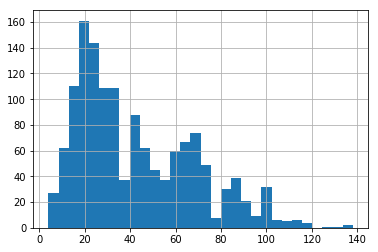

In [98]:
df['IBUs'].hist(bins=30)

## List all of the beers with IBUs above the 75th percentile

In [99]:
df[df['IBUs'] > df['IBUs'].quantile(.75)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [100]:
df[df['IBUs'] < df['IBUs'].quantile(.25)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

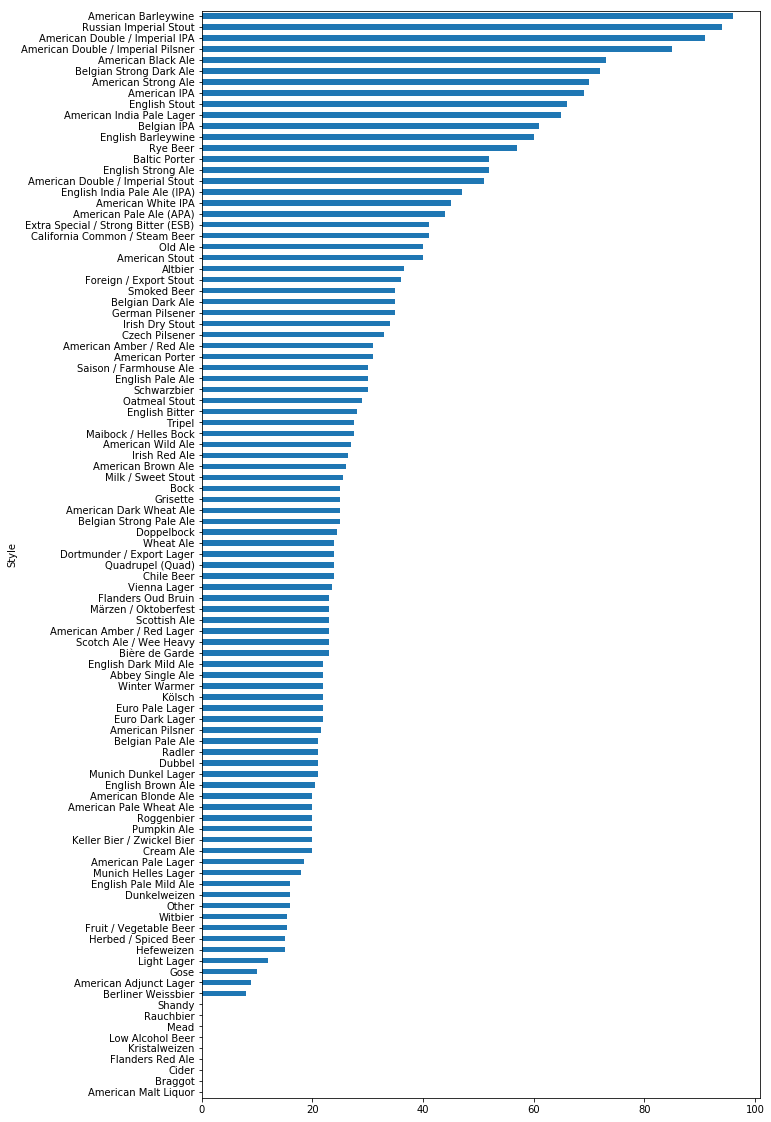

In [109]:
(df
 .groupby('Style')['IBUs']
 .median()
 .sort_values(ascending=True, na_position='first')
 .plot(
     kind='barh',
     figsize=(10,20)))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [111]:
df[df['IBUs'] < df['IBUs'].quantile(.5)]['Style'].value_counts().nlargest(5)

American Blonde Ale         58
American Pale Wheat Ale     54
American Amber / Red Ale    42
Fruit / Vegetable Beer      30
American Brown Ale          29
Name: Style, dtype: int64

In [112]:
df[df['IBUs'] > df['IBUs'].quantile(.5)]['Style'].value_counts().nlargest(5)

American IPA                      294
American Pale Ale (APA)           118
American Double / Imperial IPA     74
American Amber / Red Ale           26
American Black Ale                 18
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [134]:
styles = [
    "Witbier",
    "Hefeweizen",
    "American Pale Wheat Ale"]
df[df['Style'].isin(styles)].groupby('Style')['IBUs'].mean()

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64

Style
American Pale Wheat Ale    Axes(0.125,0.125;0.775x0.755)
Hefeweizen                 Axes(0.125,0.125;0.775x0.755)
Witbier                    Axes(0.125,0.125;0.775x0.755)
Name: IBUs, dtype: object

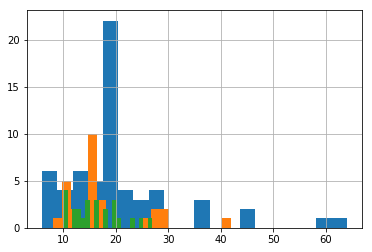

In [145]:
(df[df['Style'].isin(styles)]
 .groupby('Style')['IBUs']
 .hist(bins=20))

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [174]:
(df[df['Style'].str.contains('IPA', na=False)]
 .groupby('Style')['IBUs']
 .mean())

Style
American Double / Imperial IPA    93.320000
American IPA                      67.634551
American White IPA                48.833333
Belgian IPA                       57.000000
English India Pale Ale (IPA)      54.714286
Name: IBUs, dtype: float64

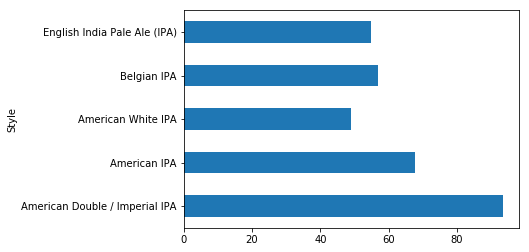

In [175]:
(df[df['Style'].str.contains('IPA', na=False)]
 .groupby('Style')['IBUs']
 .mean().plot(kind='barh'))

Style
American Double / Imperial IPA    Axes(0.125,0.125;0.775x0.755)
American IPA                      Axes(0.125,0.125;0.775x0.755)
American White IPA                Axes(0.125,0.125;0.775x0.755)
Belgian IPA                       Axes(0.125,0.125;0.775x0.755)
English India Pale Ale (IPA)      Axes(0.125,0.125;0.775x0.755)
Name: IBUs, dtype: object

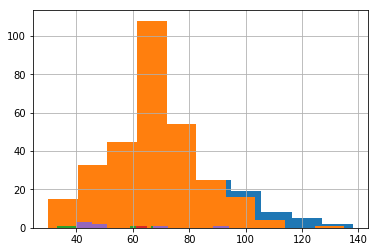

In [177]:
(df[df['Style'].str.contains('IPA', na=False)]
 .groupby('Style')['IBUs']
 .hist())

## Plot those two histograms on top of one another

## Compare the ABV of wheat beers vs. IPAs 

In [179]:
(df[df['Style'].str.contains('IPA', na=False)]
 .groupby('Style')['ABV']
 .mean())

Style
American Double / Imperial IPA    8.736893
American IPA                      6.452758
American White IPA                5.963636
Belgian IPA                       7.135294
English India Pale Ale (IPA)      6.233333
Name: ABV, dtype: float64

In [187]:
(df[df['Style'].str.lower().str.contains('wheat', na=False)]
 .groupby('Style')['ABV']
 .mean())

Style
American Dark Wheat Ale    5.233333
American Pale Wheat Ale    4.841053
Wheat Ale                  6.000000
Name: ABV, dtype: float64

Style
American Double / Imperial IPA    Axes(0.125,0.125;0.775x0.755)
American IPA                      Axes(0.125,0.125;0.775x0.755)
American White IPA                Axes(0.125,0.125;0.775x0.755)
Belgian IPA                       Axes(0.125,0.125;0.775x0.755)
English India Pale Ale (IPA)      Axes(0.125,0.125;0.775x0.755)
Name: ABV, dtype: object

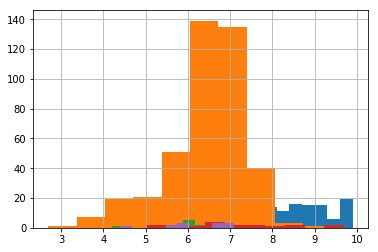

In [189]:
(df[df['Style'].str.contains('IPA', na=False)]
 .groupby('Style')['ABV']
 .hist())

Style
American Dark Wheat Ale    Axes(0.125,0.125;0.775x0.755)
American Pale Wheat Ale    Axes(0.125,0.125;0.775x0.755)
Wheat Ale                  Axes(0.125,0.125;0.775x0.755)
Name: ABV, dtype: object

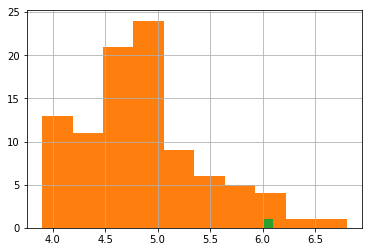

In [190]:
(df[df['Style'].str.lower().str.contains('wheat', na=False)]
 .groupby('Style')['ABV']
 .hist())